<a href="https://colab.research.google.com/github/feer-rodriguess90/Data_Generator/blob/main/WIDS_2024_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import the Libraries



In [7]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.8/917.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatib

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from skimpy import skim
from tensorflow import feature_column

# Adjust the granularity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


Step 2: Import Data and Perform Initial Analysis


In [9]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # Shuffle the training set
display(train_df.head(5))

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
9874,721115,Black,MEDICAID,GA,303,South,South Atlantic,54,F,NaN,...,57.0,72.9,77.8,79.2,77.7,79.2,64.3,47.4,44.9,120
3415,964768,NaN,COMMERCIAL,GA,302,South,South Atlantic,64,F,NaN,...,57.4,72.6,77.5,78.7,77.7,78.0,64.5,48.0,45.9,150
13003,328234,White,COMMERCIAL,CA,953,West,Pacific,59,F,NaN,...,62.2,68.4,76.6,83.7,79.3,74.8,67.4,56.8,49.4,15
575,129862,White,COMMERCIAL,IL,606,Midwest,East North Central,46,F,NaN,...,42.3,67.4,72.4,76.7,77.2,69.9,53.3,35.2,34.2,12
10595,757241,NaN,COMMERCIAL,TX,799,South,West South Central,47,F,NaN,...,66.5,74.8,83.3,82.7,81.5,75.6,62.1,50.2,44.2,48


In [10]:
# Print the size of the data set

print("Numbers of rows and columns in training set: ", train_df.shape)
print("Numbers of rows and columns in testing set: ", test_df.shape)

Numbers of rows and columns in training set:  (13173, 152)
Numbers of rows and columns in testing set:  (5646, 151)


In [11]:
# Print column name and type of the training set

print(train_df.info())
print(train_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 13173 entries, 9874 to 8043
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.4+ MB
None
patient_id                       int64
patient_race                    object
payer_type                      object
patient_state                   object
patient_zip3                     int64
                                ...   
Average of Sep-18              float64
Average of Oct-18              float64
Average of Nov-18              float64
Average of Dec-18              float64
metastatic_diagnosis_period      int64
Length: 152, dtype: object


In [12]:
skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13173  │ │ float64     │ 137   │                                                          │
│ │ Number of columns │ 152    │ │ string      │ 11    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ patient_id         │    0 │     0 │ 560000 │ 260000 │ 100000 │ 340000 │ 560000 │ 780000 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ patient_zip3       │    0 │     0 │    570 │    280 │    100 │    330 │    560 │    830 │    1000 │ ▆▅▆▅▅▇ │  │
│ │ patient_age        │    0 │     0 │     59 │     13 │     18 │     50 │     59 │     67 │      91 │  ▂▆▇▃▂ │  │
│ │ bmi                │ 9071 │ 68.86 │     29 │    5.8 │     15 │     25 │     29 │     33 │      97 │   ▇▇   │  │
│ │ population         │    0 │     0 │  21000 │  14000 │    640 │   9200 │  19000 │  30000 │   71000 │ ▇▇▅▂▁  │  │
│ │ density            │    0 │     0 │   1800 │   3900 │   0.92 │    160 │    700 │   1700 │   30000 │   ▇    │  │
│ │ age_median         │    0 │     0 │     41 │      4 │     21 │     37 │     41 │     43 │      55 │   ▅▇▃▁ │  │
│ │ age_under_10       │    0 │     0 │     11 │    1.5 │      0 │     10 │     11 │     12 │      18 │   ▁▇▃  │  │
│ │ age_10_to_19       │    0 │     0 │     13 │      2 │    6.3 │     12 │     13 │     14 │      35 │   ▂▇   │  │
│ │ age_20s            │    0 │     0 │     13 │    3.4 │    5.9 │     11 │     13 │     15 │      62 │   ▇▂   │  │
│ │ age_30s            │    0 │     0 │     13 │    2.4 │    1.5 │     11 │     12 │     14 │      25 │   ▇▃▁  │  │
│ │ age_40s            │    0 │     0 │     12 │    1.2 │    0.8 │     11 │     12 │     13 │      18 │    ▇▇  │  │
│ │ age_50s            │    0 │     0 │     13 │    1.7 │      0 │     12 │     14 │     15 │      22 │   ▁▇▃  │  │
│ │ age_60s            │    0 │     0 │     13 │    2.6 │    0.2 │     11 │     13 │     14 │      25 │   ▇▇▁  │  │
│ │ age_70s            │    0 │     0 │    7.7 │    2.1 │      0 │      6 │    7.3 │    8.8 │      19 │   ▅▇▂  │  │
│ │ age_over_80        │    0 │     0 │      4 │    1.3 │      0 │    3.3 │    3.8 │    4.6 │      19 │   ▂▇   │  │
│ │ male               │    0 │     0 │     50 │    1.7 │     40 │     49 │     50 │     51 │      62 │    ▇▃  │  │
│ │ female             │    0 │     0 │     50 │    1.7 │     38 │     49 │     50 │     51 │      60 │    ▃▇  │  │
│ │ married            │    0 │     0 │     48 │    7.5 │    0.9 │     43 │     49 │     53 │      67 │   ▁▃▇▂ │  │
│ │ divorced           │    0 │     0 │     13 │    2.1 │    0.2 │     11 │     13 │     14 │      21 │   ▃▇▃  │  │
│ │ never_married      │    0 │     0 │     34 │    8.1 │     13 │     27 │     32 │     39 │      99 │  ▃▇▂   │  │
│ │ widowed            │    0 │     0 │    5.8 │    1.6 

In [ ]:
# Print out different data types

# Categorical columns
cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
print('Categotical columns: ', cat_col)

# Numerical columns
num_col = [col for col in train_df.columns if train_df[col].dtype != 'object']
print('Numerical columns: ', num_col)

Categotical columns:  ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
Numerical columns:  ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'inc

## Data Analysis

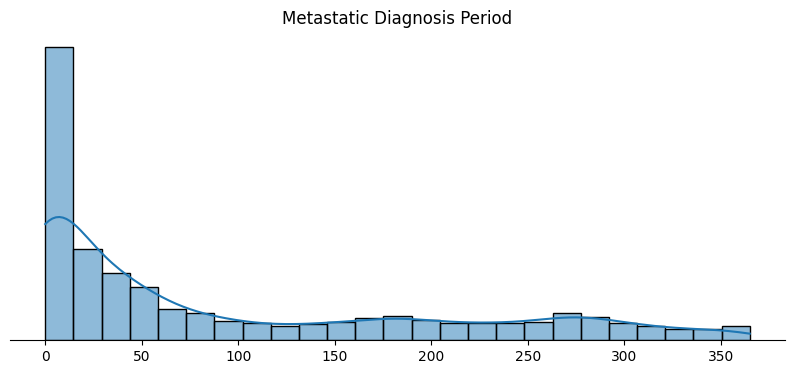

In [17]:
plt.figure(figsize=(10, 4))
sns.histplot(data=train_df, x='metastatic_diagnosis_period', kde=True)
plt.title('Metastatic Diagnosis Period')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, bottom=False)
plt.show()

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(y=train_df["patient_race"].value_counts(), x=["White", "Black", "Hispanic", "Other", "Asian"], name="Race"), row=1, col=1)
fig.add_trace(go.Bar(y=train_df["payer_type"].value_counts(), x=["Commercial", "Medicaid", "Medicare"], name="Payer Type"), row=1, col=2)



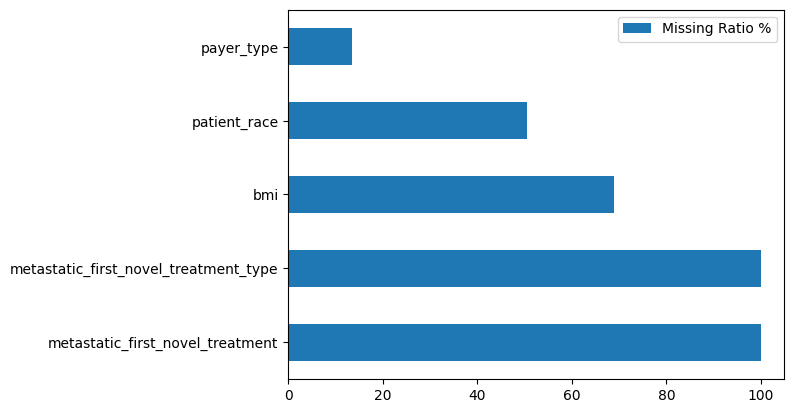

In [28]:
# Plot the columns that have the most missing values
def plot_nas(df: pd.DataFrame):
  if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %': na_df})
    missing_data_more_than_20_percent = missing_data[missing_data['Missing Ratio %'] > 10.0]
    missing_data_more_than_20_percent.plot(kind = "barh")
    plt.show()
  else:
    print('No NAs found')

plot_nas(train_df)

* High number of null values. What draws the most attention is 'bmi' which contains 69% of null data.


<Axes: xlabel='payer_type'>

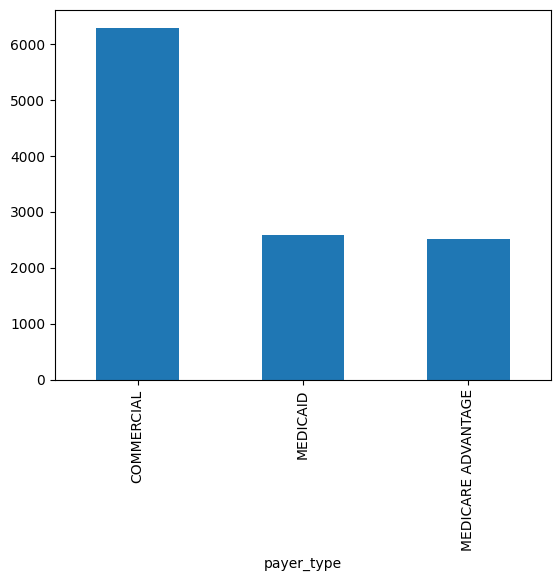

In [29]:
# Plot Categotical Columns

train_df['payer_type'].value_counts().plot(kind='bar')

In [30]:
# Print statistical summary of numerical columns

train_df['bmi'].describe()

count   4102.0
mean      29.2
std        5.8
min       15.0
25%       24.8
50%       28.6
75%       33.0
max       97.0
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Correlation Between BMI and Race')

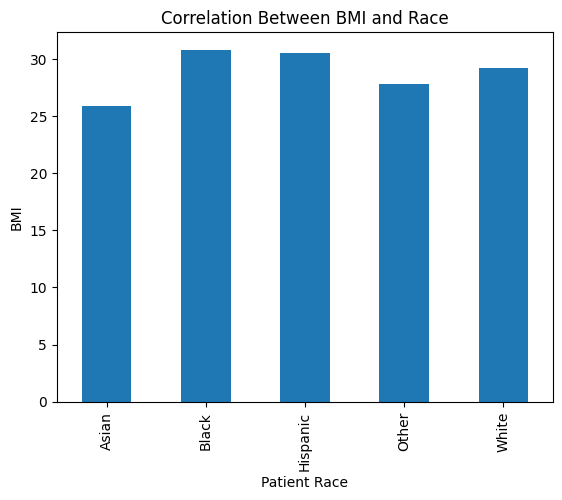

In [31]:
# Plot correlation between categorical values vs. numerical values

train_df.groupby(['patient_race'])["bmi"].mean().plot(kind='bar')
plt.xlabel('Patient Race')
plt.ylabel('BMI')
plt.title('Correlation Between BMI and Race')


<Axes: xlabel='patient_race'>

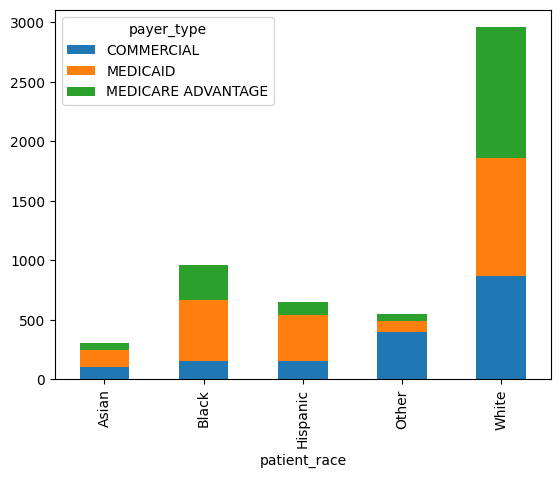

In [32]:
# Plot correlation between categorical values vs. categorical values

pd.crosstab(train_df['patient_race'], train_df['payer_type']).plot(kind="bar",stacked=True)

Step 3: Fundamental Data Cleaning Steps

Handle missing values


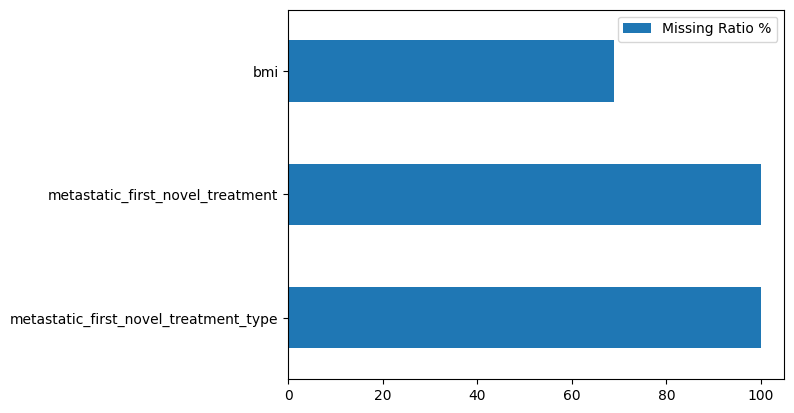

In [33]:
# Fill in empty value in the "patient_race" column with "N/A"
train_df["patient_race"].fillna("N/A", inplace=True)

# Fill in empty value in the "payer_type" column with "N/A"
train_df["payer_type"].fillna("N/A", inplace=True)

# Patient race and Payer type are not show anymore because already handle the missing value
plot_nas(train_df)

<Axes: ylabel='bmi'>

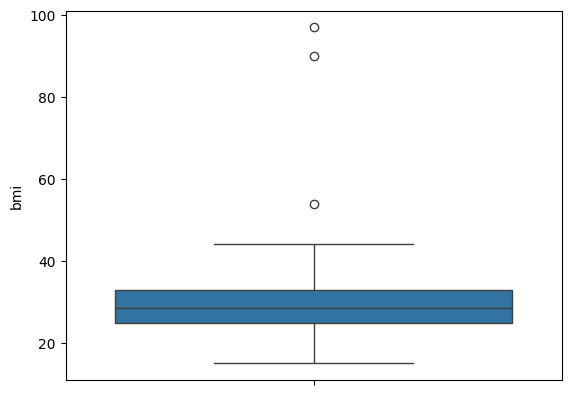

In [34]:
# Filter out data outliers

# Plot the BMI value to detect outliners
sns.boxplot(train_df['bmi'])

# outliner_train_df = train_df[train_df['bmi] > 70]
# display(outliner_train_df)

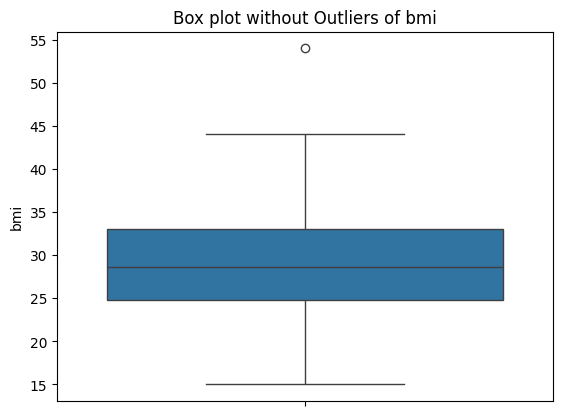

In [35]:
def removal_box_plot(df, column, threshold):
  removed_outliers = df[df[column] <= threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'Box plot without Outliers of {column}')
  plt.show()
  return removed_outliers

threshold_value = 70
no_outilers = removal_box_plot(train_df, 'bmi', threshold_value)

Step 4: Data Transformation Techniques


In [36]:
# Label Encoding
le1 = preprocessing.LabelEncoder()
train_df['payer_type_label_encode'] = le1.fit_transform(train_df['payer_type'])
display(train_df)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_label_encode
9874,721115,Black,MEDICAID,GA,303,South,South Atlantic,54,F,NaN,...,72.9,77.8,79.2,77.7,79.2,64.3,47.4,44.9,120,1
3415,964768,N/A,COMMERCIAL,GA,302,South,South Atlantic,64,F,NaN,...,72.6,77.5,78.7,77.7,78.0,64.5,48.0,45.9,150,0
13003,328234,White,COMMERCIAL,CA,953,West,Pacific,59,F,NaN,...,68.4,76.6,83.7,79.3,74.8,67.4,56.8,49.4,15,0
575,129862,White,COMMERCIAL,IL,606,Midwest,East North Central,46,F,NaN,...,67.4,72.4,76.7,77.2,69.9,53.3,35.2,34.2,12,0
10595,757241,N/A,COMMERCIAL,TX,799,South,West South Central,47,F,NaN,...,74.8,83.3,82.7,81.5,75.6,62.1,50.2,44.2,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,254132,N/A,COMMERCIAL,CA,958,West,Pacific,64,F,NaN,...,66.7,72.7,77.3,72.9,71.0,66.4,55.5,48.8,29,0
8512,846267,N/A,COMMERCIAL,GA,310,South,South Atlantic,50,F,22.7,...,74.6,80.4,81.1,80.3,80.9,69.2,53.5,50.5,321,0
2745,627729,Black,MEDICAID,GA,300,South,South Atlantic,39,F,NaN,...,72.5,77.6,78.8,77.4,78.7,64.1,47.2,44.9,34,1
9046,342448,N/A,COMMERCIAL,FL,327,South,South Atlantic,60,F,NaN,...,75.9,81.5,76.1,83.0,83.3,77.6,68.9,62.4,26,0


In [37]:
# One-hot Encoding - Generate 4 different columns based on what categories
# Get the categorical values
one_hot_enconder = LabelBinarizer()
one_hot_enconder.fit(train_df['payer_type'])
print(one_hot_enconder.classes_)

# Transform our payer_type column to 4 different binary columns corresponding to different categories
transformed = pd.DataFrame(one_hot_enconder.transform(train_df['payer_type']),columns=one_hot_enconder.classes_)
# Combine with original data frame
train_df  = pd.concat([train_df, transformed], axis=1)
display(train_df)

['COMMERCIAL' 'MEDICAID' 'MEDICARE ADVANTAGE' 'N/A']


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_label_encode,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,N/A
9874,721115,Black,MEDICAID,GA,303,South,South Atlantic,54,F,NaN,...,79.2,64.3,47.4,44.9,120,1,0,0,1,0
3415,964768,N/A,COMMERCIAL,GA,302,South,South Atlantic,64,F,NaN,...,78.0,64.5,48.0,45.9,150,0,1,0,0,0
13003,328234,White,COMMERCIAL,CA,953,West,Pacific,59,F,NaN,...,74.8,67.4,56.8,49.4,15,0,0,0,1,0
575,129862,White,COMMERCIAL,IL,606,Midwest,East North Central,46,F,NaN,...,69.9,53.3,35.2,34.2,12,0,0,0,1,0
10595,757241,N/A,COMMERCIAL,TX,799,South,West South Central,47,F,NaN,...,75.6,62.1,50.2,44.2,48,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,254132,N/A,COMMERCIAL,CA,958,West,Pacific,64,F,NaN,...,71.0,66.4,55.5,48.8,29,0,0,0,0,1
8512,846267,N/A,COMMERCIAL,GA,310,South,South Atlantic,50,F,22.7,...,80.9,69.2,53.5,50.5,321,0,0,1,0,0
2745,627729,Black,MEDICAID,GA,300,South,South Atlantic,39,F,NaN,...,78.7,64.1,47.2,44.9,34,1,1,0,0,0
9046,342448,N/A,COMMERCIAL,FL,327,South,South Atlantic,60,F,NaN,...,83.3,77.6,68.9,62.4,26,0,1,0,0,0


In [38]:
# Bucketized columns - Split its value into different categories based on numerical ranges
# Instead of representing age as a numeric column, we could split the age into several buckets

bins = [0,2,4,13,20,70,100]
labels = ['Infant','Toddler','Kid','Teen','Adult','Old Adult']
train_df['patient_age_group'] = pd.cut(train_df['patient_age'], bins=bins, labels=labels, right=False)
display (train_df)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_label_encode,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,N/A,patient_age_group
9874,721115,Black,MEDICAID,GA,303,South,South Atlantic,54,F,NaN,...,64.3,47.4,44.9,120,1,0,0,1,0,Adult
3415,964768,N/A,COMMERCIAL,GA,302,South,South Atlantic,64,F,NaN,...,64.5,48.0,45.9,150,0,1,0,0,0,Adult
13003,328234,White,COMMERCIAL,CA,953,West,Pacific,59,F,NaN,...,67.4,56.8,49.4,15,0,0,0,1,0,Adult
575,129862,White,COMMERCIAL,IL,606,Midwest,East North Central,46,F,NaN,...,53.3,35.2,34.2,12,0,0,0,1,0,Adult
10595,757241,N/A,COMMERCIAL,TX,799,South,West South Central,47,F,NaN,...,62.1,50.2,44.2,48,0,1,0,0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,254132,N/A,COMMERCIAL,CA,958,West,Pacific,64,F,NaN,...,66.4,55.5,48.8,29,0,0,0,0,1,Adult
8512,846267,N/A,COMMERCIAL,GA,310,South,South Atlantic,50,F,22.7,...,69.2,53.5,50.5,321,0,0,1,0,0,Adult
2745,627729,Black,MEDICAID,GA,300,South,South Atlantic,39,F,NaN,...,64.1,47.2,44.9,34,1,1,0,0,0,Adult
9046,342448,N/A,COMMERCIAL,FL,327,South,South Atlantic,60,F,NaN,...,77.6,68.9,62.4,26,0,1,0,0,0,Adult


In [39]:
# Scaling

display(train_df["home_value"])

9874    369017.0
3415    181644.2
13003   346010.3
575     312873.1
10595   146044.8
          ...   
10944   442071.8
8512    113184.4
2745    276631.7
9046    246810.3
8043    196648.8
Name: home_value, Length: 13173, dtype: float64

In [40]:
# Min-Max Scaling (normalization)

def min_max_scaling(df, column_name):
  min_value = df[column_name].min()
  max_value = df[column_name].max()
  df[column_name] = (df[column_name] - min_value) / (max_value - min_value)

# Apply min-max scaling to 'Salary' column
min_max_scaling(train_df, 'home_value')

# Print the DataFrame after min-max scaling
print("DataFrame after Min-Max Scaling:")
display(train_df["home_value"])

DataFrame after Min-Max Scaling:


9874    0.2
3415    0.1
13003   0.2
575     0.1
10595   0.0
         ..
10944   0.2
8512    0.0
2745    0.1
9046    0.1
8043    0.1
Name: home_value, Length: 13173, dtype: float64